In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [2]:
# Load your dataset
df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\AirPassengers.csv", parse_dates=['Month'], index_col='Month')

# Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Check the data
df.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# Fit the ARIMA(1, 1, 1) model
model = ARIMA(df['#Passengers'], order=(12, 2, 12))  # p=12, d=12, q=12
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\st

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:               ARIMA(12, 2, 12)   Log Likelihood                -552.151
Date:                Tue, 23 Jul 2024   AIC                           1154.301
Time:                        10:39:26   BIC                           1228.197
Sample:                    01-01-1949   HQIC                          1184.330
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3554      1.674     -0.212      0.832      -3.635       2.925
ar.L2         -0.4544      1.274     -0.356      0.721      -2.952       2.044
ar.L3         -0.4393      1.809     -0.243      0.8

C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


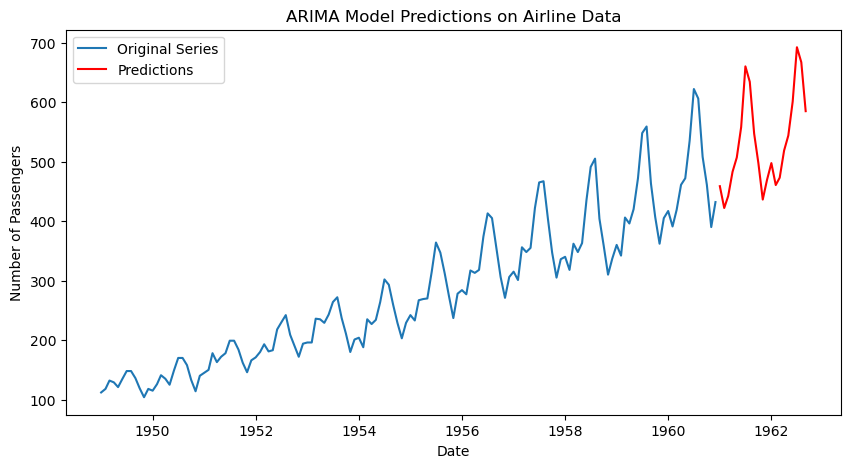

In [4]:
# Make predictions
start = len(df)  # Start point for predictions
end = start + 20  # End point for predictions (20 steps ahead)
predictions = model_fit.predict(start=start, end=end, typ='levels')  # Generate predictions

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['#Passengers'], label='Original Series')
plt.plot( predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
ADF Statistic (Differenced Data): -2.829266824169992
p-value (Differenced Data): 0.0542132902838265


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\st

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -674.675
Date:                Tue, 23 Jul 2024   AIC                           1367.351
Time:                        10:39:27   BIC                           1394.016
Sample:                    01-01-1949   HQIC                          1378.186
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6569      0.107     -6.119      0.000      -0.867      -0.446
ar.L2          0.5069      0.116      4.362      0.000       0.279       0.735
ar.L3          0.1616      0.119      1.353      0.1

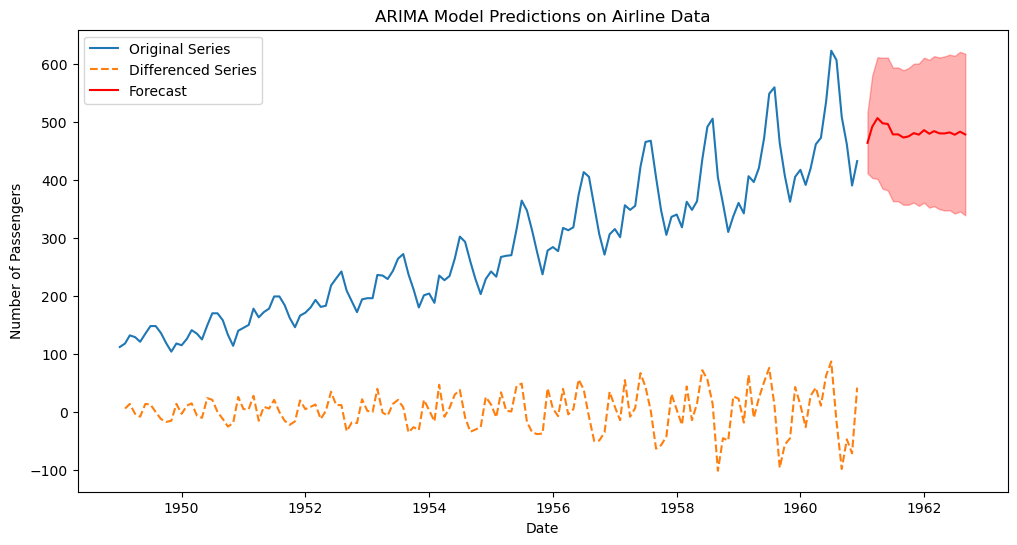

In [5]:
series = df['#Passengers']
# Check for stationarity
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# If the p-value > 0.05, the data is not stationary
# Differencing the data
series_diff = series.diff().dropna()
# Check for stationarity again
result = adfuller(series_diff)
print('ADF Statistic (Differenced Data):', result[0])
print('p-value (Differenced Data):', result[1])
# Fit ARIMA model (use the differenced data)
model_arima = ARIMA(series, order=(5, 1, 3))  # Adjust (p, d, q) as necessary
model_arima_fit = model_arima.fit()
# Print the summary of the fitted model
print(model_arima_fit.summary())
# Make predictions
start = len(series)
end = start + 20
forecast = model_arima_fit.get_forecast(steps=20)
forecast_index = pd.date_range(start=series.index[-1], periods=21, freq='M')[1:]  # Dates for predictions
# Get the predicted values and confidence intervals
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series')
plt.plot(series_diff, label='Differenced Series', linestyle='--')
plt.plot(forecast_index, predicted_mean, label='Forecast', color='red')
# Plot confidence intervals
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('ARIMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()